In [1]:
from umap import UMAP
import umap.plot
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from scripts.embeddings.preprocessing import prepare_sentences
from scripts.embeddings.sbert import create_embedding
from wordcloud import WordCloud

c:\Users\Michi\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Cluster Visualization with UMAP

In [2]:
data = pd.read_excel("data/Recommendations_label.xlsx")
sentences = data["Recommendation"]
clean = prepare_sentences(sentences)

In [44]:
agglomerative_12 = pd.read_excel("results_new/agglomerative_12.xlsx")["Label"]
agglomerative_9 = pd.read_excel("results_new/agglomerative_9.xlsx")["Label"]
agglomerative_7 = pd.read_excel("results_new/agglomerative_7.xlsx")["Label"]
affinity = pd.read_excel("results_new/affinity.xlsx")["Label"]
kmeans_11 = pd.read_excel("results_new/kmeans_11.xlsx")["Label"]
kmeans_6 = pd.read_excel("results_new/kmeans_6.xlsx")["Label"]
kmeans_7 = pd.read_excel("results_new/kmeans_7.xlsx")["Label"]
spectral_7 = pd.read_excel("results_new/spectral_7.xlsx")["Label"]
spectral_8 = pd.read_excel("results_new/spectral_8.xlsx")["Label"]
spectral_11 = pd.read_excel("results_new/spectral_11.xlsx")["Label"]
true = pd.read_excel("data/Recommendations_label.xlsx")["Label"]

In [8]:
embedding = create_embedding(clean)

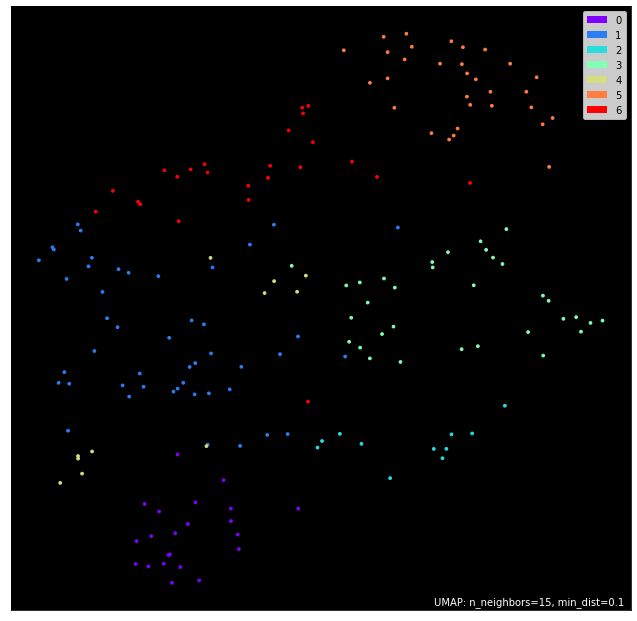

In [49]:
mapper = UMAP(random_state=25).fit(embedding)
umap.plot.points(mapper, labels=spectral_7, theme="fire")
plt.savefig("visualizations/umap_spectral_7_dark.png", bbox_inches='tight')

# Cluster Exploration (Word Cloud)

In [17]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from scripts.embeddings.cTFIDF.ctfidf import CTFIDFVectorizer

# Get data
docs = pd.DataFrame({'Document': clean, 'Class': data["Label"]})
docs_per_class = docs.groupby(['Class'], as_index=False).agg({'Document': ' '.join})

# Create bag of words
count_vectorizer = CountVectorizer().fit(docs_per_class.Document)
count = count_vectorizer.transform(docs_per_class.Document)
words = count_vectorizer.get_feature_names()

# Extract top 10 words
ctfidf = CTFIDFVectorizer().fit_transform(count, n_samples=len(docs)).toarray()
words_per_class = {f"Cluster {label-1}": [words[index] for index in ctfidf[label-1].argsort()[-10:]] for label in docs_per_class.Class}


c:\Users\Michi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
words_per_class

{'Cluster 0': ['failure',
  'reduce',
  'help',
  'channel',
  'use',
  'communication',
  'contact',
  'prepare',
  'statement',
  'customer'],
 'Cluster 1': ['train',
  'virtual',
  'create',
  'team',
  'communication',
  'crt',
  'member',
  'make',
  'organisation',
  'crisis'],
 'Cluster 2': ['tactical',
  'report',
  'create',
  'management',
  'strategic',
  'benefit',
  'program',
  'position',
  'process',
  'improvement'],
 'Cluster 3': ['ask',
  'check',
  'life',
  'phone',
  'improve',
  'via',
  'quality',
  'service',
  'smart',
  'side'],
 'Cluster 4': ['everbridge',
  'evaluation',
  'etc',
  'factor',
  'report',
  'fine',
  'damage',
  'separately',
  'general',
  'ledger'],
 'Cluster 5': ['vstp',
  'rigourous',
  'capacity',
  'risk',
  'vendor',
  'testing',
  'scenario',
  'production',
  'performance',
  'test'],
 'Cluster 6': ['vital',
  'block',
  'administration',
  'repair',
  'strong',
  'society',
  'range',
  'release',
  'stepwise',
  'network']}

In [31]:
top_words_df = pd.DataFrame(words_per_class)
top_words_df

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
0,failure,train,tactical,ask,everbridge,vstp,vital
1,reduce,virtual,report,check,evaluation,rigourous,block
2,help,create,create,life,etc,capacity,administration
3,channel,team,management,phone,factor,risk,repair
4,use,communication,strategic,improve,report,vendor,strong
5,communication,crt,benefit,via,fine,testing,society
6,contact,member,program,quality,damage,scenario,range
7,prepare,make,position,service,separately,production,release
8,statement,organisation,process,smart,general,performance,stepwise
9,customer,crisis,improvement,side,ledger,test,network


Print wordcloud of each cluster into folder 'visualizations/word-clouds'

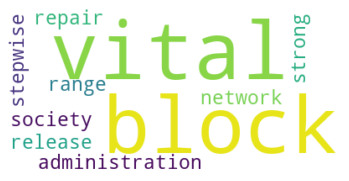

In [117]:
for cluster in top_words_df.columns:
    wordcloud = WordCloud(background_color="white").generate((" ").join(top_words_df[cluster].values))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.savefig(f"visualizations/word-clouds/topic_{cluster}", bbox_inches='tight', pad_inches=0.2)


Put all wordclouds into a subplot (very small images)

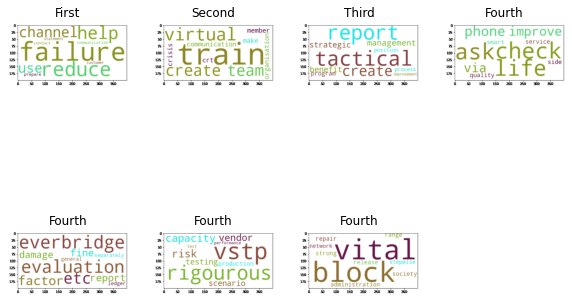

In [114]:
import cv2
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 4
  
# reading images
Image1 = cv2.imread('visualizations/word-clouds/topic_Cluster 0.png')
Image2 = cv2.imread('visualizations/word-clouds/topic_Cluster 1.png')
Image3 = cv2.imread('visualizations/word-clouds/topic_Cluster 2.png')
Image4 = cv2.imread('visualizations/word-clouds/topic_Cluster 3.png')
Image5 = cv2.imread('visualizations/word-clouds/topic_Cluster 4.png')
Image6 = cv2.imread('visualizations/word-clouds/topic_Cluster 5.png')
Image7 = cv2.imread('visualizations/word-clouds/topic_Cluster 6.png')
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Third")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Fourth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("Fourth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title("Fourth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(Image7)
plt.axis('off')
plt.title("Fourth")

plt.savefig("visualizations/word-clouds/word_clouds.png", bbox_inches="tight", pad_inches=0.01)

